📚 IMPORTING LIBRARIES

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
dataset=pd.read_csv("IPL_DATASET.csv")
dataset.head()


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


# CLEANING 

In [25]:
dataset.info() #info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [26]:
#removing unwanted columns from the dataset
dataset.drop(["id","neutral_venue","method"],axis=1,inplace=True)


In [22]:
dataset.head()

,city,date,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
0,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen
1,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri
2,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,Aleem Dar,GA Pratapkumar
3,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper
4,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan


In [31]:
#null values
#print(dataset.isnull().sum())
df=dataset

city               13
date                0
player_of_match     0
venue               0
team1               0
team2               0
toss_winner         0
toss_decision       0
winner              0
result              0
result_margin      17
eliminator          0
umpire1             0
umpire2             0
dtype: int64


In [30]:
##Filling null values in 4 columns  as None since the empty rows in 'result' column 
#indicating that the match was called off and hence no winner
df['result']=df['result'].fillna('None')
df['eliminator']=df['eliminator'].fillna('None')
df['player_of_match']=df['player_of_match'].fillna('None')
df['winner']=df['winner'].fillna('None')
df.isnull().sum()

city               13
date                0
player_of_match     0
venue               0
team1               0
team2               0
toss_winner         0
toss_decision       0
winner              0
result              0
result_margin      17
eliminator          0
umpire1             0
umpire2             0
dtype: int64

In [32]:
#Rows having 'result_margin' column as null
#The corresponding mathes were tied
df[df['result_margin'].isnull()]

,city,date,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
66,Cape Town,2009-04-23,YK Pathan,Newlands,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,Y,MR Benson,M Erasmus
130,Chennai,2010-03-21,J Theron,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,Y,K Hariharan,DJ Harper
241,Delhi,2011-05-21,None,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,None,None,NaN,None,SS Hazare,RJ Tucker
328,Hyderabad,2013-04-07,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,Y,AK Chaudhary,S Ravi
341,Bangalore,2013-04-16,V Kohli,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,Y,M Erasmus,VA Kulkarni
416,Abu Dhabi,2014-04-29,JP Faulkner,Sheikh Zayed Stadium,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,Y,Aleem Dar,AK Chaudhary
476,Ahmedabad,2015-04-21,SE Marsh,"Sardar Patel Stadium, Motera",Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,tie,NaN,Y,M Erasmus,S Ravi
486,Bangalore,2015-04-29,None,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,None,None,NaN,None,JD Cloete,PG Pathak
511,Bangalore,2015-05-17,None,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,None,None,NaN,None,HDPK Dharmasena,K Srinivasan
610,Rajkot,2017-04-29,KH Pandya,Saurashtra Cricket Association Stadium,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,Mumbai Indians,tie,NaN,Y,AK Chaudhary,CB Gaffaney


In [33]:
# Filling null value in 'result_margin' with 0.0
df['result_margin']=df['result_margin'].fillna('0.0')
df.isnull().sum()

city               13
date                0
player_of_match     0
venue               0
team1               0
team2               0
toss_winner         0
toss_decision       0
winner              0
result              0
result_margin       0
eliminator          0
umpire1             0
umpire2             0
dtype: int64

In [34]:
#Rows having city null
#Matches held in stadiums of Sharjah and Dubai having city column empty
df[df['city'].isnull()]

,city,date,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
399,NaN,2014-04-17,YS Chahal,Sharjah Cricket Stadium,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8,N,Aleem Dar,S Ravi
402,NaN,2014-04-19,PA Patel,Dubai International Cricket Stadium,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7,N,Aleem Dar,AK Chaudhary
403,NaN,2014-04-19,JP Duminy,Dubai International Cricket Stadium,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,Delhi Daredevils,wickets,4,N,Aleem Dar,VA Kulkarni
404,NaN,2014-04-20,GJ Maxwell,Sharjah Cricket Stadium,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,7,N,BF Bowden,M Erasmus
406,NaN,2014-04-22,GJ Maxwell,Sharjah Cricket Stadium,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Kings XI Punjab,runs,72,N,M Erasmus,S Ravi
407,NaN,2014-04-23,RA Jadeja,Dubai International Cricket Stadium,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,field,Chennai Super Kings,runs,7,N,HDPK Dharmasena,RK Illingworth
408,NaN,2014-04-24,CA Lynn,Sharjah Cricket Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,2,N,Aleem Dar,VA Kulkarni
409,NaN,2014-04-25,AJ Finch,Dubai International Cricket Stadium,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,4,N,M Erasmus,S Ravi
410,NaN,2014-04-25,MM Sharma,Dubai International Cricket Stadium,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Chennai Super Kings,wickets,7,N,BF Bowden,M Erasmus
413,NaN,2014-04-27,M Vijay,Sharjah Cricket Stadium,Delhi Daredevils,Mumbai Indians,Mumbai Indians,bat,Delhi Daredevils,wickets,6,N,Aleem Dar,VA Kulkarni


In [35]:
##Replacing null value with Sharjah and Dubai according to the match venue
df['city'][df['venue'] == 'Sharjah Cricket Stadium'] = df['city'].fillna('Sharjah')
df['city'][df['venue'] == 'Dubai International Cricket Stadium'] = df['city'].fillna('Dubai')

In [44]:
df.isnull().sum()
# finally dataset is ready to play...!!!!!!
actual_name=['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
    'Rising Pune Supergiant', 'Royal Challengers Bangalore',
    'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
    'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
    'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants', 'Delhi Capitals']

reknowed_names = ['SRH','MI','GL','PUNE','RCB','KKR','DC','KXIP','CSK','RR','SRH','KERALA','PUNE','PUNE','DC']

df.replace(actual_name,reknowed_names,inplace = True)

In [45]:
#IPL
ipl=df
ipl.head()

,city,date,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
0,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,RCB,KKR,RCB,field,KKR,runs,140,N,Asad Rauf,RE Koertzen
1,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",KXIP,CSK,CSK,bat,CSK,runs,33,N,MR Benson,SL Shastri
2,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,DC,RR,RR,bat,DC,wickets,9,N,Aleem Dar,GA Pratapkumar
3,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,MI,RCB,MI,bat,RCB,wickets,5,N,SJ Davis,DJ Harper
4,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,KKR,SRH,SRH,bat,KKR,wickets,5,N,BF Bowden,K Hariharan


#data visulization


# MOST WINS

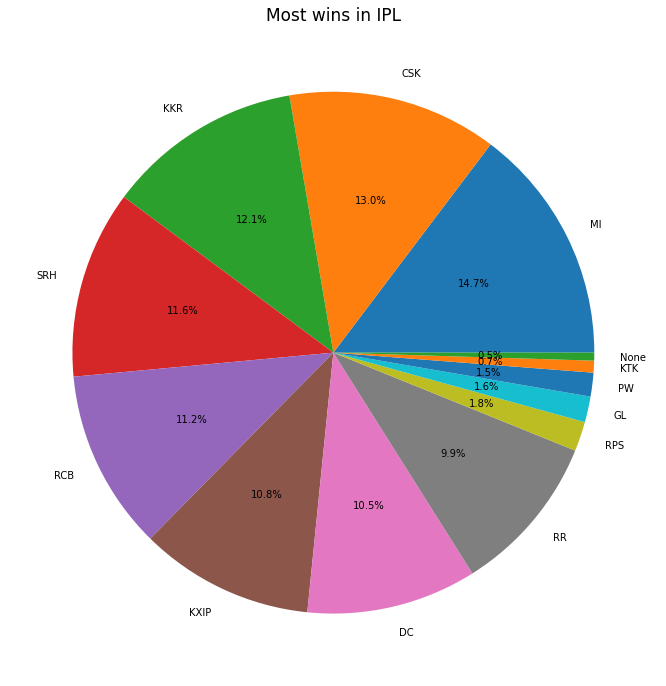

In [76]:
labels=ipl.winner.value_counts().index.tolist()
values= ipl.winner.value_counts().tolist()
bar,ax=plt.subplots(figsize=(20,12))
ax=plt.pie(values,autopct="%.1f%%",labels=labels)
plt.title("Most wins in IPL",fontsize=17)
plt.show()

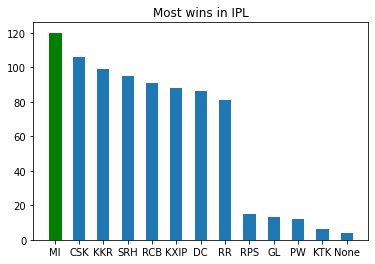

In [84]:
bar=plt.bar(labels,values,width=0.5)
plt.title("Most wins in IPL")
bar[0].set_color('g')
#bar[1].set_color('c')
plt.show()

# MOST WINS IN ELIMINATOR

In [87]:
#ipl[ipl["eliminator"]=="Y"]["winner"].value_counts()

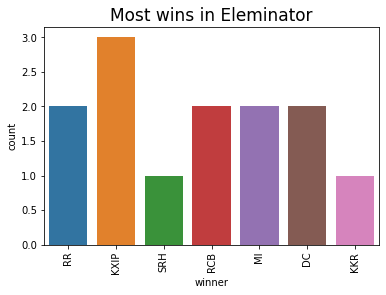

In [92]:
sns.countplot(ipl['winner'][ipl['eliminator']=='Y'],data=ipl)
plt.title("Most wins in Eleminator",fontsize=17)
plt.xticks(rotation=90)
plt.show()

# Top 10 famous venues

In [94]:
ipl.columns

Index(['city', 'date', 'player_of_match', 'venue', 'team1', 'team2',
       'toss_winner', 'toss_decision', 'winner', 'result', 'result_margin',
       'eliminator', 'umpire1', 'umpire2'],
      dtype='object')

In [96]:
ipl.venue.value_counts()[:10]

Eden Gardens                                  77
Feroz Shah Kotla                              74
Wankhede Stadium                              73
M Chinnaswamy Stadium                         65
Rajiv Gandhi International Stadium, Uppal     64
MA Chidambaram Stadium, Chepauk               57
Sawai Mansingh Stadium                        47
Punjab Cricket Association Stadium, Mohali    35
Dubai International Cricket Stadium           33
Sheikh Zayed Stadium                          29
Name: venue, dtype: int64

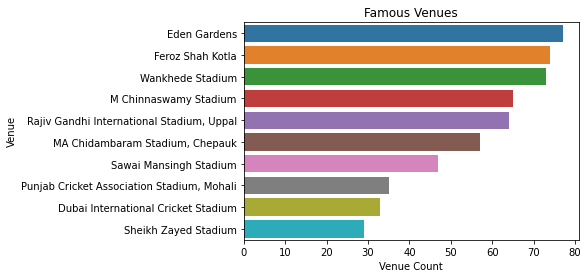

In [97]:
sns.barplot(x=ipl['venue'].value_counts().head(10).values,y=ipl['venue'].value_counts().head(10).index,data=ipl)
plt.title("Famous Venues")
plt.xlabel("Venue Count")
plt.ylabel("Venue")
plt.show()

# Top 5 Umpires

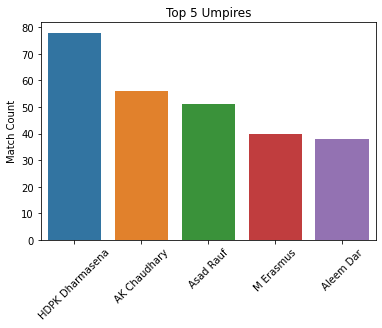

In [99]:
sns.barplot(x=ipl['umpire1'].value_counts().head().index,
            y=ipl['umpire1'].value_counts().head().values,
            data=ipl)
plt.xticks(rotation=45)
plt.xlabel=("umpire 1")
plt.ylabel("Match Count")
plt.title('Top 5 Umpires')
plt.show()

# Most MOM award winning player

In [100]:
ipl["player_of_match"].value_counts()

AB de Villiers    23
CH Gayle          22
RG Sharma         18
MS Dhoni          17
DA Warner         17
                  ..
GD McGrath         1
MR Marsh           1
CRD Fernando       1
BA Bhatt           1
SB Jakati          1
Name: player_of_match, Length: 234, dtype: int64

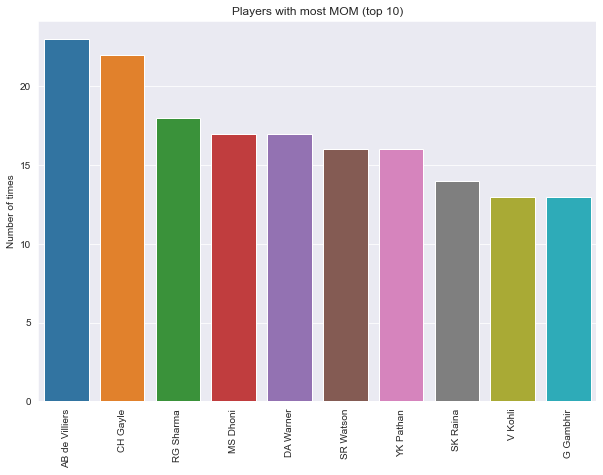

In [104]:
#Top 10 players with most number of MOM award
most_mom=ipl['player_of_match'].value_counts()
most_mom=most_mom[:10,]
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.barplot(most_mom.index,most_mom.values)
plt.title("Players with most MOM (top 10)")
#plt.xlabel("Players")
plt.ylabel("Number of times")
plt.xticks(rotation=90)
plt.show()
#AB de Villiers has the most Man of the Match awards.

# Number of matches played in various seasons :


In [145]:
ipl['Season'] = pd.DatetimeIndex(ipl['date']).year


In [144]:
#ipl.groupby("Season").size().plot(kind="bar")
#value=new_group["Season"].count().tolist()
#new_group


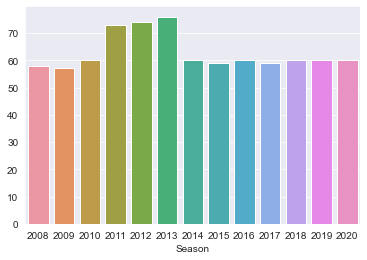

In [148]:
result=ipl.groupby("Season").size()
sns.barplot(result.index,result.values)


# Has toss winning helped in match winning

In [150]:
ipl.head(2)

,city,date,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2,Season
0,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,RCB,KKR,RCB,field,KKR,runs,140,N,Asad Rauf,RE Koertzen,2008
1,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",KXIP,CSK,CSK,bat,CSK,runs,33,N,MR Benson,SL Shastri,2008


In [171]:
toss_match_winners=ipl[ipl["toss_winner"]==ipl["winner"]]
count_of_toss_match_winners=toss_match_winners.shape[0]
count_of_toss_match_lossers=ipl.shape[0]-count_of_toss_match_winners

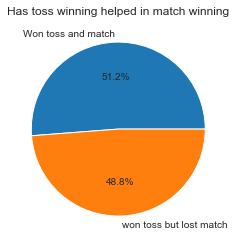

In [172]:
toss=plt.pie([count_of_toss_match_winners,count_of_toss_match_lossers],labels=["Won toss and match","won toss but lost match"],autopct="%.1f%%")
plt.title("Has toss winning helped in match winning")
plt.show()

In [169]:
Toss_Winning = ipl[ipl['toss_winner'] == ipl['winner']]
ipl['Toss_vs_Winner'] = ''
ipl['Toss_vs_Winner'][ipl['toss_winner'] == ipl['winner']] = 'Yes'
ipl['Toss_vs_Winner'][ipl['toss_winner'] != ipl['winner']] = 'No'
ipl['Toss_vs_Winner'].value_counts()

<ipython-input-169-52b9df3f76f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipl['Toss_vs_Winner'][ipl['toss_winner'] == ipl['winner']] = 'Yes'
<ipython-input-169-52b9df3f76f7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipl['Toss_vs_Winner'][ipl['toss_winner'] != ipl['winner']] = 'No'


Yes    418
No     398
Name: Toss_vs_Winner, dtype: int64

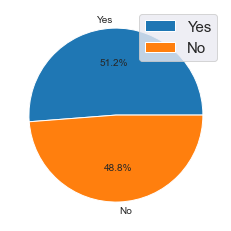

In [168]:
plt.pie(ipl['Toss_vs_Winner'].value_counts() , autopct = '%1.1f%%' , labels = ipl['Toss_vs_Winner'].value_counts().index)
plt.legend(fontsize = 15)
plt.show()

From the above plot we can derive an insight that winning the toss gives significant advantage in winning the matches. Lets check which decision makes more likely to win the matches

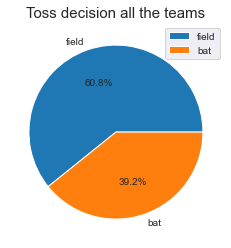

In [174]:
#Toss decision in all the matches
plt.pie(ipl['toss_decision'].value_counts() , autopct = '%1.1f%%' , labels = ipl['toss_decision'].value_counts().index)
plt.legend(fontsize = 10)
plt.title('Toss decision all the teams' , fontsize = 15)
plt.show()

From this graph ,it is clear that 60.7 % of the times toss winning team choose to filed first and only 39.3% times choose to bat first

# which team had won maximum matches  in  a single  season

In [233]:
max_matches=ipl.groupby("Season")
final=max_matches["winner"].value_counts()
value=final.values
#print(value)
#lable=final.index
print(lable[0][1])
#plt.bar(lable,value)
#res=max_matches[max_matches["winner"].value_counts().max()]
#res = res.reset_index()
#res

RR


# venues played from most to least

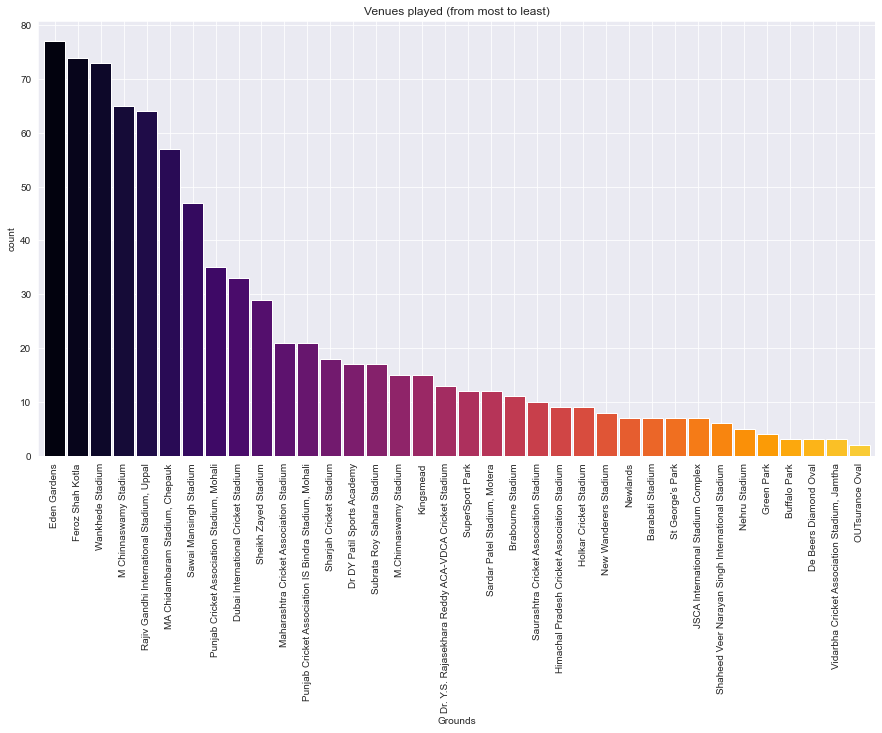

In [180]:
plt.subplots(figsize=(15,8))
ax = ipl['venue'].value_counts().sort_values(ascending=False).plot.bar(width=.9,color=sns.color_palette('inferno',40))
ax.set_xlabel('Grounds')
ax.set_ylabel('count')
plt.title("Venues played (from most to least)")
plt.show()